# Prerequisites

In [1]:
import numpy as np
import pandas as pd
from tm import StockDataProvider
from tm.trading_rules import SimpleMovingAverage, ExponentialMovingAverage, STO, MACD, RSI, ROC
from tm.optimizers import GeneticOptimizer, StrategyPerformanceEvaluator, map_chromosome_to_trading_rule_parameters, filter_for_active_rules, calculate_absolute_buy_and_hold_returns
from tm.backtesting import GeometricBrownianMotion, MonteCarloCrossValidation
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

Define the trading rule basis for the strategy.

In [2]:
trading_rules = [SimpleMovingAverage, ExponentialMovingAverage, STO, MACD, RSI, ROC]

Define a function which finds the best strategy by running the genetic algorithm and applying backtesting.

In [3]:
# Returns best strategy as bitvector
def find_best_strategy(ticker_name, start, end, ngen=5):
    data = StockDataProvider(ticker_name, start=start, end=end)
    optimizer = GeneticOptimizer(data, trading_rules, random_seed=42)
    print('Running genetic algorithm ...')
    hof = optimizer.run(pop_size=1000, ngen=ngen, hof_size=100)
    print('Net profit of buy and hold:', calculate_absolute_buy_and_hold_returns(data))
    gbm = GeometricBrownianMotion(data)
    crossvalidator = MonteCarloCrossValidation(hof, gbm, trading_rules)
    print('Running backtesting ...')
    best_individual = crossvalidator.run(num_iterations=100, time_steps=85)
    del optimizer
    return best_individual

Define a function which prints the results for the testing period.

In [4]:
def print_test_results(individual, ticker_name, start, end):
    real_data = StockDataProvider(ticker_name, start=start, end=end)
    rule_instances = list(map(lambda Rule, params: Rule(real_data, *params), trading_rules, map_chromosome_to_trading_rule_parameters(individual, trading_rules)))
    active_rule_instances = filter_for_active_rules(individual, rule_instances)
    evaluator = StrategyPerformanceEvaluator(active_rule_instances)
    net_profit = evaluator.calculate_net_profit()
    net_profit_bh = calculate_absolute_buy_and_hold_returns(real_data)
    percentage_profit = net_profit / real_data.history['Close'].iloc[0] * 100
    percentage_profit_bh = net_profit_bh / real_data.history['Close'].iloc[0] * 100
    print('Active rules:', list(map(lambda rule: rule.__class__.__name__, active_rule_instances)))
    print('Active rules\' parameters:', list(map(lambda param: param[1], filter(lambda param: trading_rules[param[0]] in map(lambda rule: rule.__class__, active_rule_instances), enumerate(map_chromosome_to_trading_rule_parameters(individual, trading_rules))))))
    print('Net profit of strategy: {:f}'.format(net_profit))
    print('Net profit of buy and hold: {:f}'.format(net_profit_bh))
    print('Percentage profit of strategy: {:f}%'.format(percentage_profit))
    print('Percentage profit of buy and hold: {:f}%'.format(percentage_profit_bh))
    print('Number of buy signals:', len(evaluator.buy_signals[evaluator.buy_signals == True]))
    print('Number of sell signals:', len(evaluator.sell_signals[evaluator.sell_signals == True]))
    return evaluator, percentage_profit, percentage_profit_bh

Define a function which can plot a strategy.

In [5]:
def plot_strategy(evaluator, ticker_name, start, end):
    data = StockDataProvider(ticker_name, start=start, end=end)
    
    fig, ax = plt.subplots(figsize=(16, 8))
    
    ax.plot(data.history['Close'], label='Stock prices')

    buy_points = pd.Series(data=map(lambda index, price: price if evaluator.buy_signals.loc[index] == True else np.nan, data.history['Close'].index, data.history['Close']),
                           index=data.history['Close'].index)
    ax.scatter(x=buy_points.index, y=buy_points, color='green', marker='^', label='Buy signal')
    
    sell_points = pd.Series(data=map(lambda index, price: price if evaluator.sell_signals.loc[index] == True else np.nan, data.history['Close'].index, data.history['Close']),
                           index=data.history['Close'].index)
    ax.scatter(x=sell_points.index, y=sell_points, color='red', marker='v', label='Sell signal')

    ax.set_xlabel('Date')
    ax.set_ylabel('Stock price')
    ax.legend()
    fig.tight_layout()

# Experiments

In [6]:
results = {'DAX': [],
           'Adidas': [],
           'Allianz': [],
           'BASF': [],
           'Deutsche Bank': [],
           'Deutsche Telekom': [],
           'SAP': [],
           'Dow Jones Index': [],
           'Cisco': [],
           'DowDuPont': [],
           'JPMorgan Chase': [],
           'Microsoft': [],
           'Nike': [],
           'United Health': []}

## DAX

## Adidas

## Allianz

## BASF

## Deutsche Bank

## Deutsche Telekom

## SAP

In [7]:
%%time
best_individual = find_best_strategy(ticker_name='SAP', start='2014-11-05', end='2015-03-31', ngen=5)

Running genetic algorithm ...
gen	nevals	min     	max    	mean    	std   
0  	1000  	-78.2239	8.39255	-3.69005	12.491
1  	599   	-75.5383	10.1427	1.3125  	6.17032
2  	612   	-76.7056	13.4828	3.04314 	6.35514
3  	613   	-68.9038	13.4828	4.33903 	5.72942
4  	589   	-68.4077	13.4828	5.61866 	5.08204
5  	601   	-69.26  	13.4828	6.71749 	6.74894
Net profit of buy and hold: 4.990475000000002
Running backtesting ...
Best individual: [1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0]
Best average net profit: 1.7870390694264493
CPU times: user 6min 43s, sys: 2.14 s, total: 6min 45s
Wall time: 6min 47s


In [8]:
evaluator, percentage_profit, percentage_profit_bh = print_test_results(best_individual, ticker_name='SAP', start='2015-04-01', end='2015-07-30')
results['SAP'].append([percentage_profit, percentage_profit_bh])

Active rules: ['MACD', 'RSI']
Active rules' parameters: [[57, 18, 25], [201, 42, 82]]
Net profit of strategy: -1.858975
Net profit of buy and hold: 0.627300
Percentage profit of strategy: -2.814071%
Percentage profit of buy and hold: 0.949591%
Number of buy signals: 3
Number of sell signals: 3


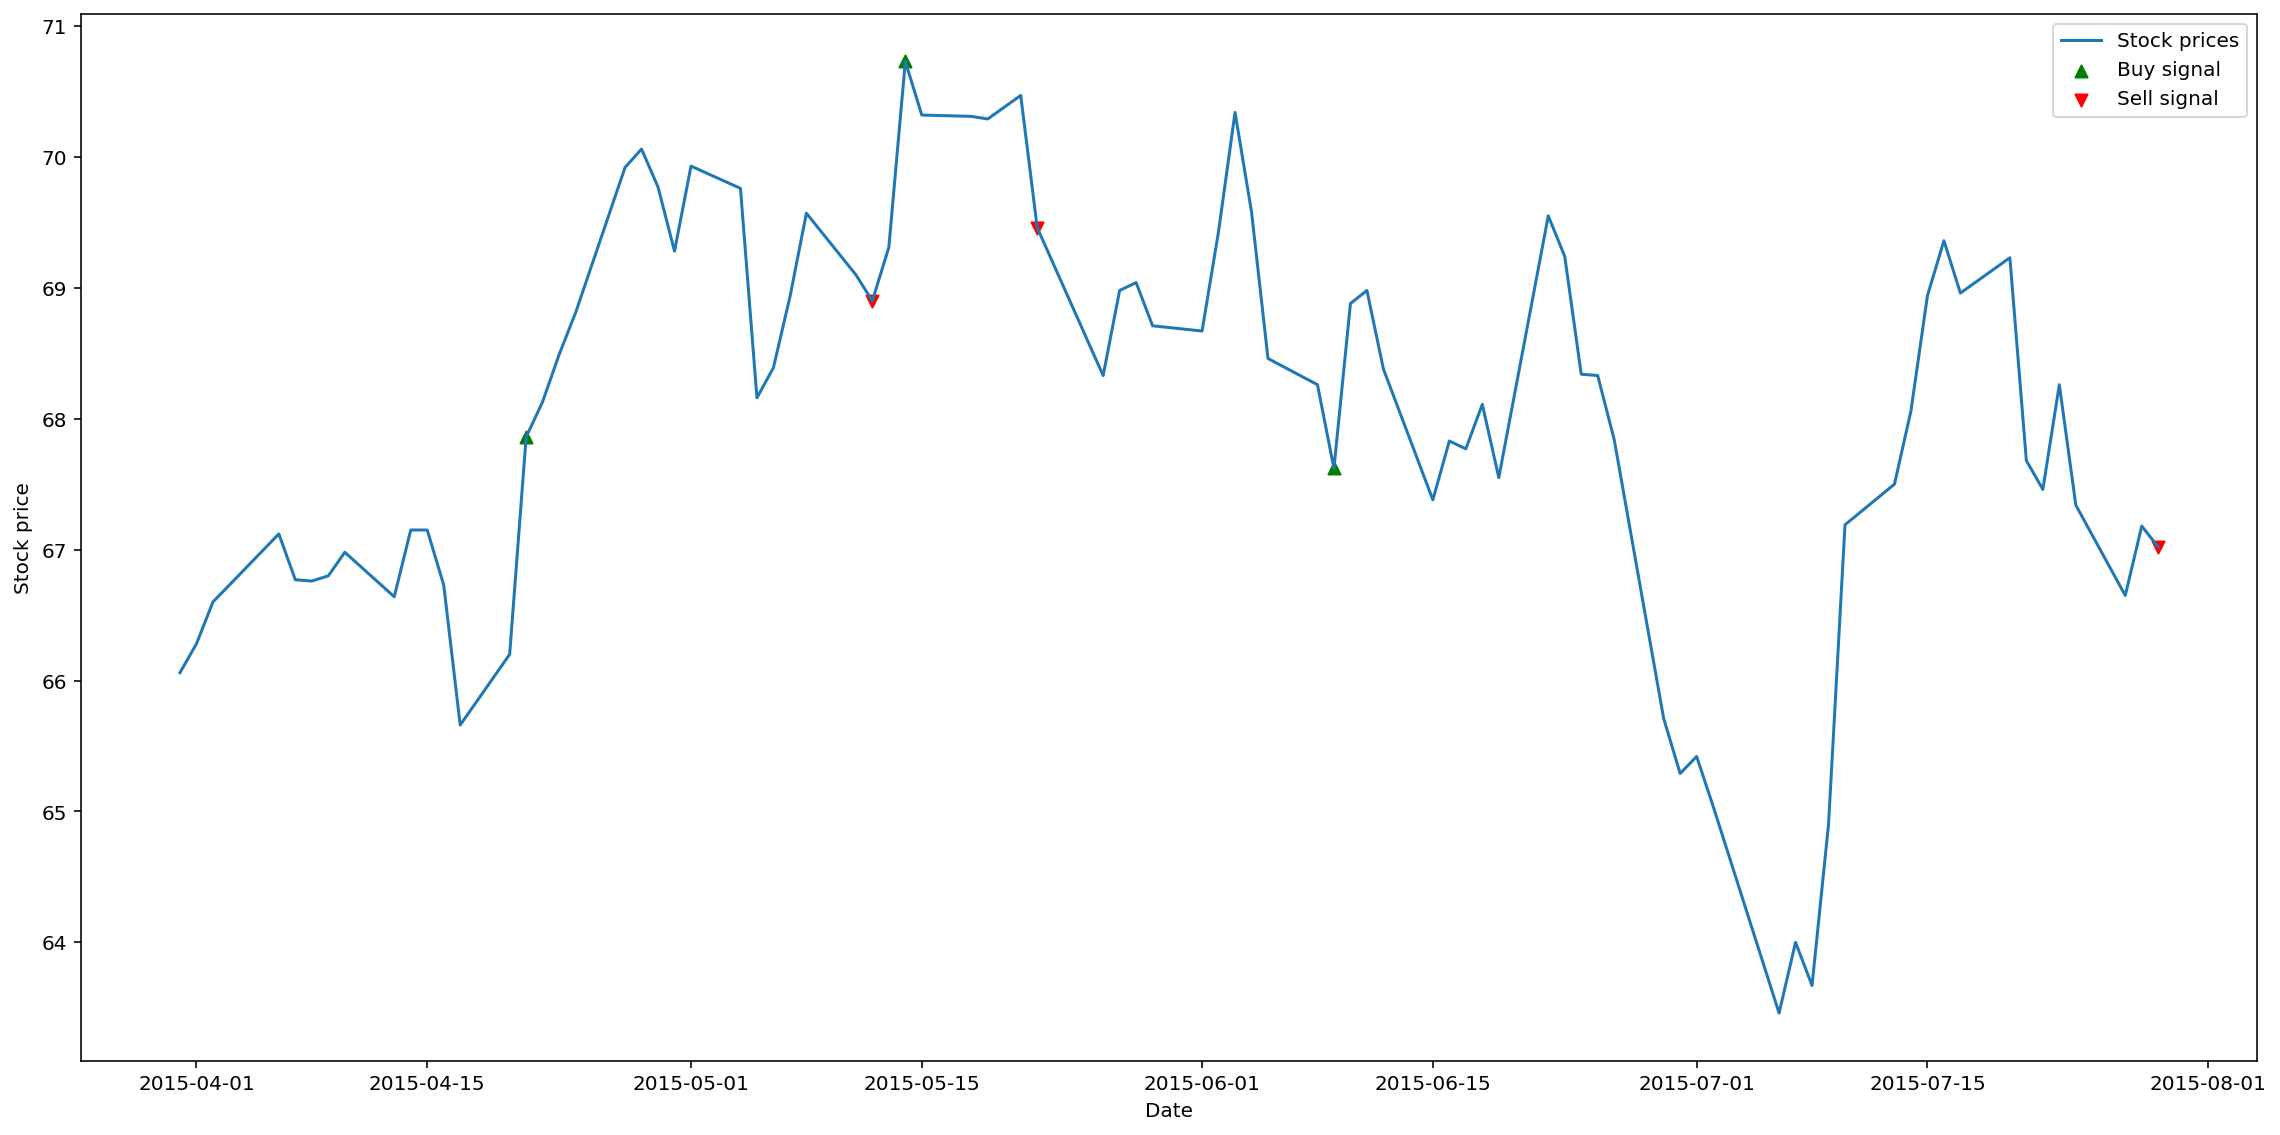

In [9]:
plot_strategy(evaluator, ticker_name='SAP', start='2015-04-01', end='2015-07-30')

In [10]:
%%time
best_individual = find_best_strategy(ticker_name='SAP', start='2015-05-07', end='2015-09-27', ngen=5)

/Users/phipag/miniconda3/envs/trading_machine/lib/python3.7/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/Users/phipag/miniconda3/envs/trading_machine/lib/python3.7/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


Running genetic algorithm ...
gen	nevals	min     	max    	mean    	std    
0  	1000  	-76.8619	2.33052	-12.1313	17.4691
1  	599   	-77.3585	2.33052	-5.34162	7.81565
2  	612   	-74.4481	4.41572	-2.30534	4.90658
3  	613   	-76.6868	4.72495	-0.994084	5.74523
4  	589   	-74.4481	4.72495	-0.381867	5.84046
5  	601   	-73.8716	4.72495	0.366155 	5.76903
Net profit of buy and hold: -9.349375000000002
Running backtesting ...
Best individual: [1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1]
Best average net profit: -2.0008988407920567
CPU times: user 7min 30s, sys: 2.37 s, total: 7min 32s
Wall time: 7min 35s


In [11]:
evaluator, percentage_profit, percentage_profit_bh = print_test_results(best_individual, ticker_name='SAP', start='2015-09-28', end='2016-01-26')
results['SAP'].append([percentage_profit, percentage_profit_bh])

Active rules: ['RSI']
Active rules' parameters: [[122, 29, 40]]
Net profit of strategy: 0.000000
Net profit of buy and hold: 12.313800
Percentage profit of strategy: 0.000000%
Percentage profit of buy and hold: 20.899185%
Number of buy signals: 0
Number of sell signals: 0


KeyError: Timestamp('2016-01-06 00:00:00')

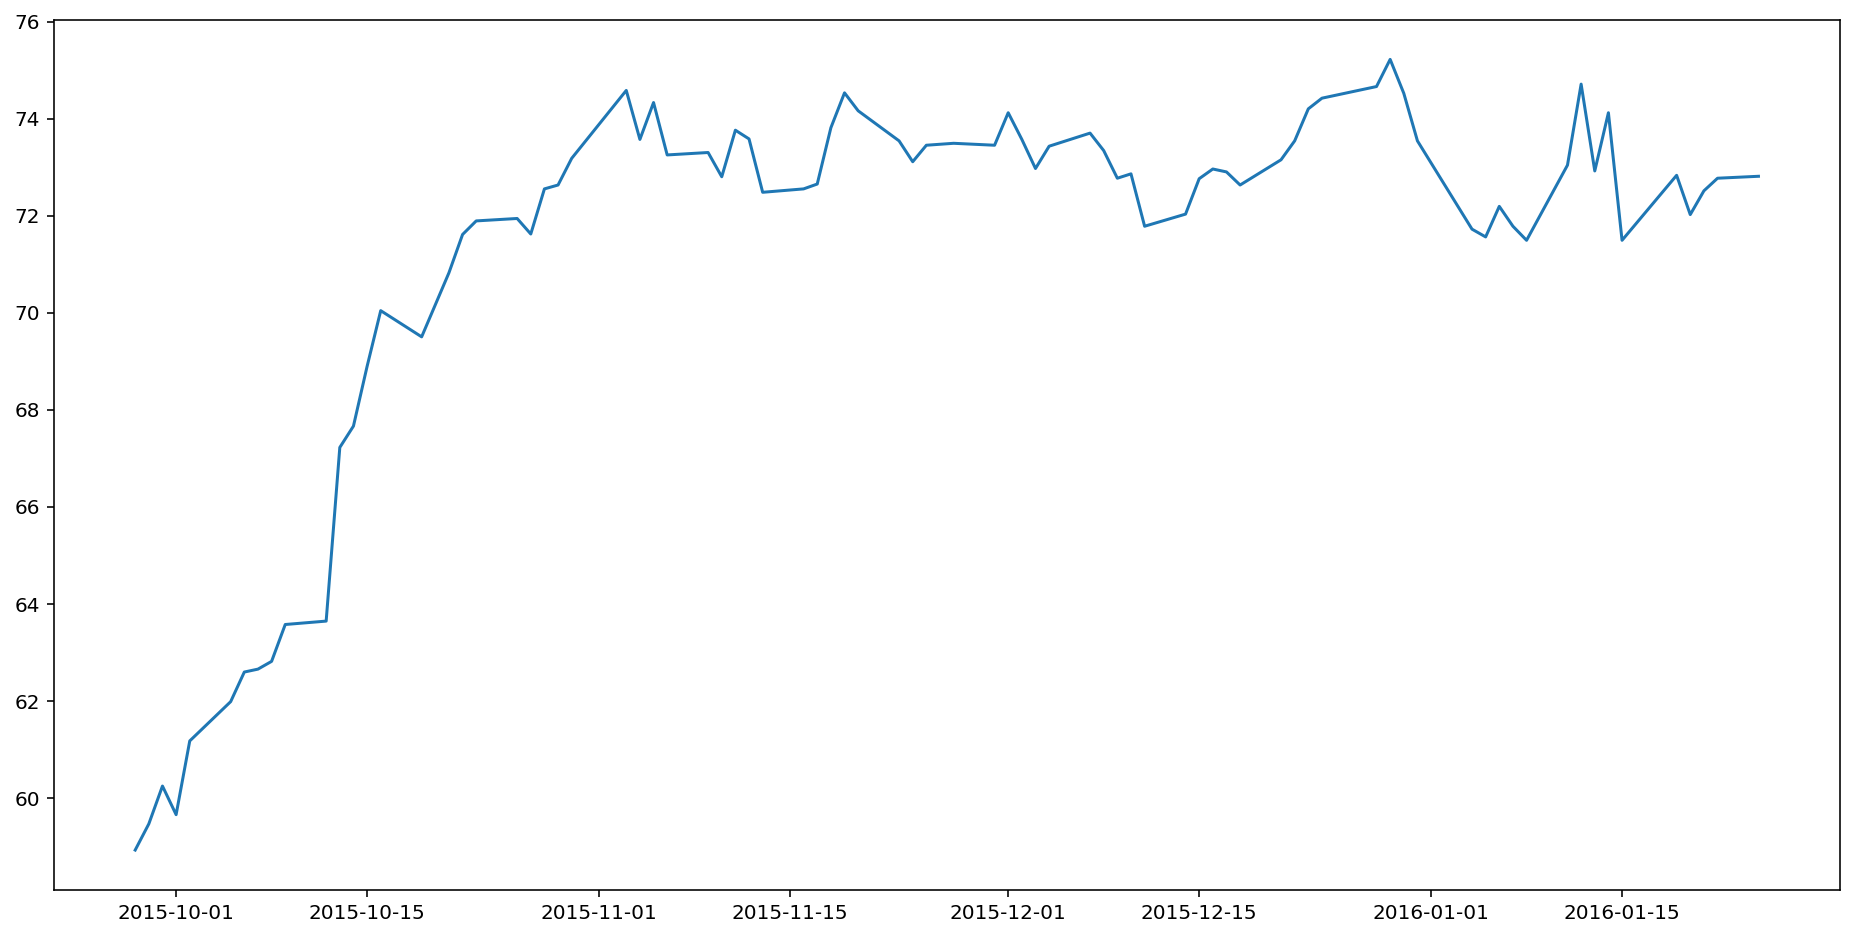

In [14]:
plot_strategy(evaluator, ticker_name='SAP', start='2015-09-28', end='2016-01-26')

In [ ]:
%%time
best_individual = find_best_strategy(ticker_name='SAP', start='2015-10-31', end='2016-03-25', ngen=5)

In [ ]:
evaluator, percentage_profit, percentage_profit_bh = print_test_results(best_individual, ticker_name='SAP', start='2016-03-26', end='2016-07-24')
results['SAP'].append([percentage_profit, percentage_profit_bh])

In [ ]:
plot_strategy(evaluator, ticker_name='SAP', start='2016-03-26', end='2016-07-24')

In [ ]:
%%time
best_individual = find_best_strategy(ticker_name='SAP', start='2016-04-30', end='2016-09-21', ngen=5)

In [ ]:
evaluator, percentage_profit, percentage_profit_bh = print_test_results(best_individual, ticker_name='SAP', start='2016-09-22', end='2017-01-20')
results['SAP'].append([percentage_profit, percentage_profit_bh])

In [ ]:
plot_strategy(evaluator, ticker_name='SAP', start='2016-09-22', end='2017-01-20')

In [ ]:
%%time
best_individual = find_best_strategy(ticker_name='SAP', start='2016-10-25', end='2017-03-20', ngen=5)

In [ ]:
evaluator, percentage_profit, percentage_profit_bh = print_test_results(best_individual, ticker_name='SAP', start='2017-03-21', end='2017-07-19')
results['SAP'].append([percentage_profit, percentage_profit_bh])

In [ ]:
plot_strategy(evaluator, ticker_name='SAP', start='2017-03-21', end='2017-07-19')

## Dow Jones Index

## Cisco

## DowDuPont

## JPMorgan Chase

## Microsoft

## Nike

## UnitedHealth